In [2]:
import os
import sys
import time
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import torch

In [3]:
import model
import dataset
import engine
import utils

reload(model)
reload(dataset)
reload(engine)
reload(utils)

<module 'utils' from '/home/zfr19/Documents/project1/utils.py'>

In [4]:
try:
    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
    torch.cuda.get_device_properties(device)
except:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device

device(type='cuda', index=1)

# Visulization

In [118]:
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]

In [155]:
types = ["AQI", "CO", "NO2", "O3", "PM10", "PM2.5", "SO2"]

In [119]:
df = pd.read_pickle('./data/df_train.pkl')

In [128]:
df

,AQI_万寿西宫,CO_万寿西宫,NO2_万寿西宫,O3_万寿西宫,PM10_万寿西宫,PM2.5_万寿西宫,SO2_万寿西宫,AQI_万柳,CO_万柳,NO2_万柳,...,PM2.5_奥体中心,SO2_奥体中心,AQI_官园,CO_官园,NO2_官园,O3_官园,PM10_官园,PM2.5_官园,SO2_官园,time
4388,44.0,0.4,16.0,54.5,21.1,3.0,10.6,45.0,0.3,14.7,...,13.7,19.0,31.0,0.3,15.5,44.1,6.4,5.7,13.2,2015010100
4389,41.0,0.4,17.5,53.5,13.6,3.0,11.6,43.0,0.3,11.6,...,11.4,15.6,29.0,0.3,13.1,46.9,8.0,7.9,12.0,2015010101
4390,38.0,0.4,15.4,55.5,13.9,3.9,10.5,39.0,0.3,10.6,...,13.6,16.3,26.0,0.2,10.8,48.8,6.8,3.8,11.7,2015010102
4391,36.0,0.4,13.4,57.1,18.6,4.2,13.7,37.0,0.4,8.3,...,10.1,10.2,23.0,0.3,12.5,47.0,8.1,4.9,11.5,2015010103
4392,35.0,0.4,12.1,58.4,15.6,4.4,15.0,36.0,0.4,8.6,...,12.9,14.4,21.0,0.3,12.1,48.0,5.0,3.0,12.9,2015010104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39554,61.0,0.8,64.0,1.0,72.0,39.0,7.0,61.0,0.7,54.0,...,32.0,9.0,59.0,0.7,57.0,7.0,68.0,33.0,9.0,2019123119
39555,65.0,0.8,65.0,2.0,79.0,44.0,7.0,58.0,0.6,52.0,...,38.0,9.0,63.0,0.7,58.0,7.0,75.0,37.0,10.0,2019123120
39556,67.0,0.8,64.0,2.0,83.0,44.0,7.0,62.0,0.8,56.0,...,42.0,8.0,64.0,0.7,58.0,5.0,77.0,38.0,11.0,2019123121
39557,65.0,0.9,66.0,2.0,80.0,47.0,7.0,59.0,0.8,58.0,...,34.0,8.0,64.0,0.8,67.0,1.0,78.0,35.0,8.0,2019123122


AQI
CO
NO2
O3
PM10
PM2.5
SO2


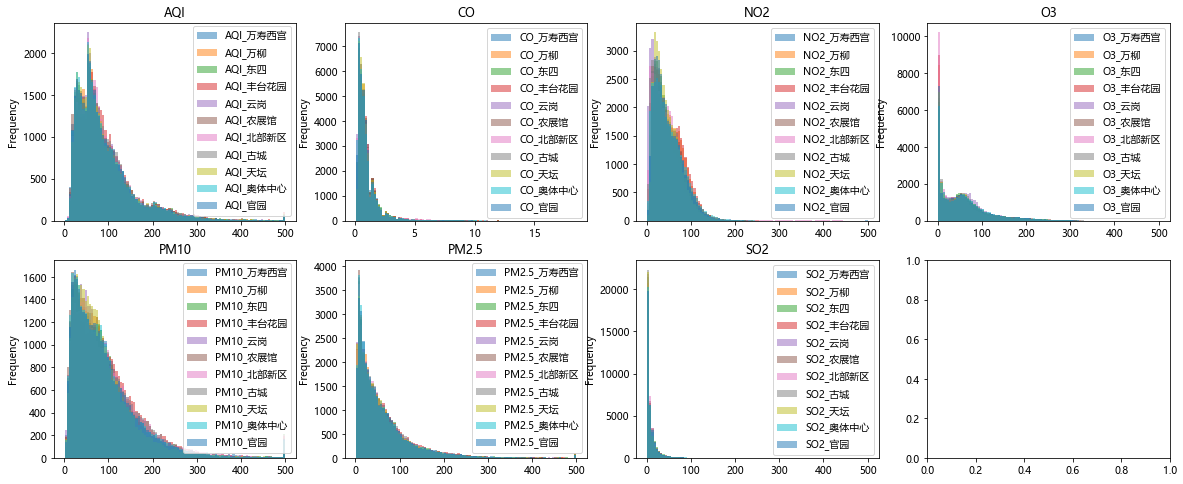

In [162]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for idx,typ in enumerate(types):
    print(typ)
    df[[i for i in df.columns.values if i.startswith(typ)]].clip(upper=500).plot(kind='hist',alpha=0.5,bins=100,title=typ,ax=axes[divmod(idx,4)])

In [203]:
df2=df[df.time//1e4==201901].clip(upper=500)

In [204]:
df3=pd.DataFrame(0,columns=types,index=range(len(df2)*11))

In [205]:
for typ in types:
    df3[typ]=df2[[i for i in df2.columns.values if i.startswith(typ)]].values.reshape(-1,1)

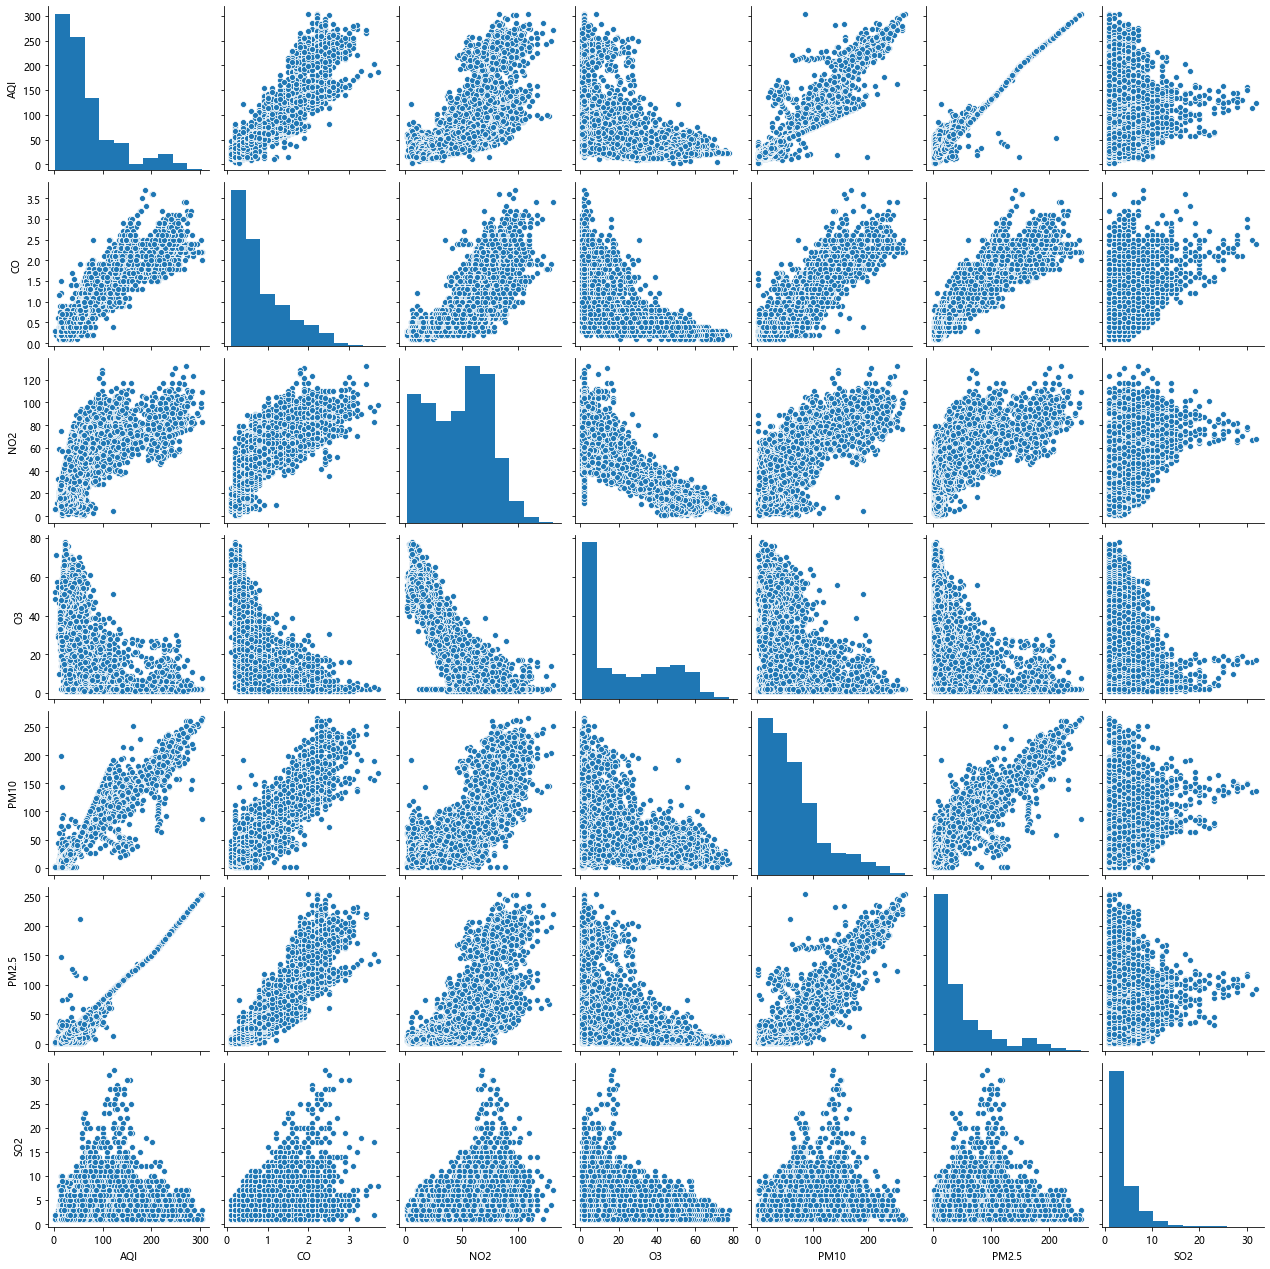

In [202]:
sb.pairplot(df3)

AQI
CO
NO2
O3
PM10
PM2.5
SO2


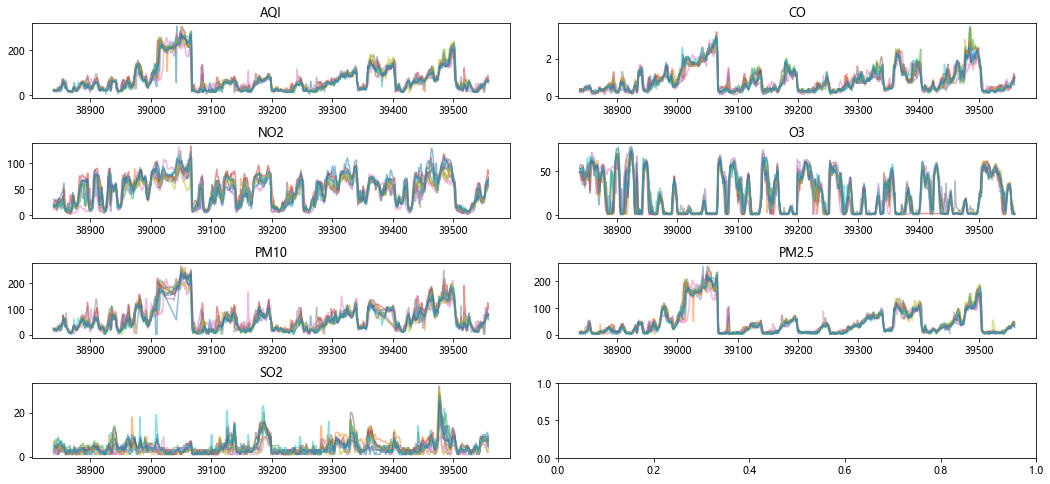

In [183]:
fig,axes=plt.subplots(4,2,figsize=(18,8))
fig.subplots_adjust(hspace=0.6, wspace=0.1)
for idx,typ in enumerate(types):
    print(typ)
    # df[[i for i in df.columns.values if i.startswith(typ)]].clip(upper=500).plot(kind='hist',alpha=0.5,bins=100,title=typ,ax=axes[divmod(idx,4)])
    df[[i for i in df.columns.values if i.startswith(typ)]][df.time//1e4==201912].clip(upper=500).plot(legend=None,alpha=.5,ax=axes[divmod(idx,2)],title=typ)

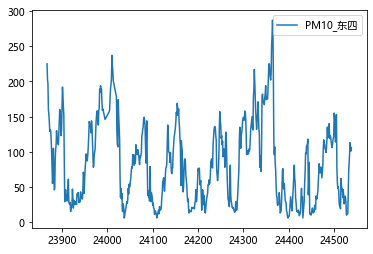

In [120]:
# df[(df.type == 'PM2.5') & (df.date // 100 == 201711)].iloc[:, 3:].plot(legend=None)
df[df.time // 10000 == 201711][[i for i in df.columns.values if i.startswith("PM10_东四")]].plot()

# Hyperparams

In [6]:
torch.backends.cudnn.benchmark = True
T = 6
lr = 0.002
weight_decay = 0
batch_size = 64

# data

In [7]:
dataset_train = dataset.AirDataset("train", T, use_extra=False)
dataset_val = dataset.AirDataset("val", T, use_extra=False)
# dataset_test = dataset.AirDataset('test', T)

In [8]:
dataloader_train = torch.utils.data.DataLoader(
    dataset_train, batch_size=batch_size, shuffle=True, collate_fn=dataset.collate_fn, num_workers=0, pin_memory=True
)
dataloader_val = torch.utils.data.DataLoader(
    dataset_val, batch_size=batch_size, shuffle=False, collate_fn=dataset.collate_fn, num_workers=0, pin_memory=True
)
# dataloader_test = torch.utils.data.DataLoader(
#     dataset_test, batch_size=batch_size, shuffle=False, collate_fn=dataset.collate_fn, num_workers=0, pin_memory=True
# )

# model

In [12]:
# encoder = model.AttnEncoder(T=T)
# decoder = model.AttnDecoder(T=T)
encoder = model.Encoder(input_size=22, T=T)
decoder = model.Decoder(T=T)

encoder.to(device)
decoder.to(device)

optimizer0 = torch.optim.Adam([p for p in encoder.parameters() if p.requires_grad], lr=lr, weight_decay=weight_decay)
optimizer1 = torch.optim.Adam([p for p in decoder.parameters() if p.requires_grad], lr=lr, weight_decay=weight_decay)

lr_scheduler0 = torch.optim.lr_scheduler.StepLR(optimizer0, step_size=3, gamma=0.1)
lr_scheduler1 = torch.optim.lr_scheduler.StepLR(optimizer1, step_size=3, gamma=0.1)
criterion = torch.nn.MSELoss()

# train

In [18]:
num_epoch = 7
losses = []
preds = []
for epoch in range(num_epoch):
    losses += engine.train_one_epoch(
        encoder, decoder, optimizer0, optimizer1, criterion, dataloader_train, device, epoch, print_freq=100, teacher_force=1
    )
    lr_scheduler0.step()
    lr_scheduler1.step()
    a = engine.evaluate(encoder, decoder, dataloader_val, device,)
    print(a.values.mean())
    preds.append(a.values.mean())

np.save("./data/losses" + time.strftime("%m%d-%H%M"), losses)
np.save("./data/preds" + time.strftime("%m%d-%H%M"), preds)

Epoch: [0]  [  0/550]  eta: 0:00:41  lr: 0.002000  loss: 0.0304 (0.0304)  time: 0.0750  data: 0.0080  max mem: 6
Epoch: [0]  [100/550]  eta: 0:00:25  lr: 0.002000  loss: 0.0018 (0.0036)  time: 0.0545  data: 0.0029  max mem: 6
Epoch: [0]  [200/550]  eta: 0:00:19  lr: 0.002000  loss: 0.0012 (0.0026)  time: 0.0565  data: 0.0031  max mem: 6
Epoch: [0]  [300/550]  eta: 0:00:14  lr: 0.002000  loss: 0.0014 (0.0022)  time: 0.0567  data: 0.0028  max mem: 6
Epoch: [0]  [400/550]  eta: 0:00:08  lr: 0.002000  loss: 0.0012 (0.0020)  time: 0.0547  data: 0.0030  max mem: 6
Epoch: [0]  [500/550]  eta: 0:00:02  lr: 0.002000  loss: 0.0009 (0.0018)  time: 0.0555  data: 0.0029  max mem: 6
Epoch: [0]  [549/550]  eta: 0:00:00  lr: 0.002000  loss: 0.0009 (0.0017)  time: 0.0587  data: 0.0030  max mem: 6
Epoch: [0] Total time: 0:00:31 (0.0564 s / it)
0.5933333333333333
Epoch: [1]  [  0/550]  eta: 0:00:34  lr: 0.002000  loss: 0.0007 (0.0007)  time: 0.0630  data: 0.0040  max mem: 6
Epoch: [1]  [100/550]  eta: 0:

In [19]:
checkpoint_path = "./data/checkpoint_zfr.pt"
torch.save({"encoder": encoder.state_dict(), "decoder": decoder.state_dict()}, checkpoint_path)

# eval

In [95]:
encoder = model.Encoder(input_size=22, T=T)
decoder = model.Decoder(T=T)
encoder.to(device)
decoder.to(device)


Decoder(
  (lstm_layer): LSTM(11, 64)
  (fc): Linear(in_features=75, out_features=11, bias=True)
  (fc_final): Linear(in_features=128, out_features=11, bias=True)
)

In [96]:
checkpoint_path = "./data/checkpoint_zfr.pt"
checkpoint = torch.load(checkpoint_path, map_location=device)
encoder.load_state_dict(checkpoint["encoder"])
decoder.load_state_dict(checkpoint["decoder"])

<All keys matched successfully>

In [103]:
dataset_test = dataset.AirDatasetMutation("test", T, use_extra=False)
dataloader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=batch_size, shuffle=False, collate_fn=dataset.collate_fn, num_workers=0, pin_memory=True,
)

In [104]:
len(dataset_test)

1691

In [105]:
confusions, precisions = engine.evaluate(encoder, decoder, dataloader_test, device, True)

In [106]:
precisions.values.mean()

0.5116666666666667

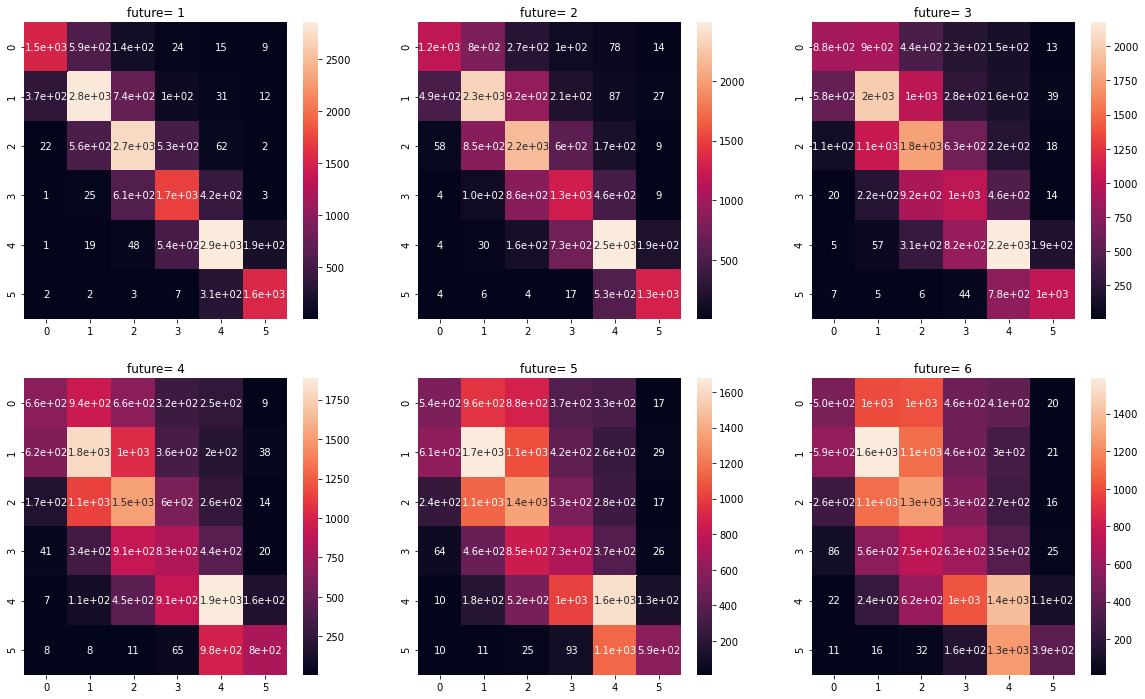

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(6):
    df = pd.DataFrame(confusions[i].round(2))
    ax=sb.heatmap(df, annot=True, ax=axes[divmod(i, 3)],)
    ax.set_title(f'future= {i+1}')
plt.savefig('./report/confusion',pad_inches=-1)

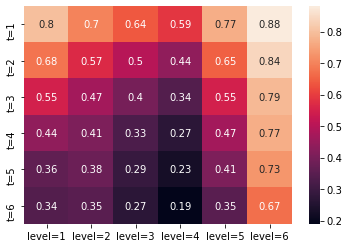

In [108]:
sb.heatmap(precisions, annot=True, )

In [109]:
recalls = np.zeros((6, 6))
for i in range(6):
    recalls[i] = np.diag(confusions[i]) / (confusions[i].sum(1)+1e-8)
df = pd.DataFrame(recalls.round(2), index=[f't={i}' for i in range(1, 7)], columns=[f'level={i}' for i in range(1, 7)])


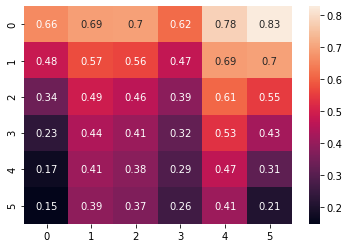

In [110]:
sb.heatmap(recalls, annot=True, )